In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt




# Loading the data 

In [23]:

dataPath = "/Users/inclusive/creativeEnergy-/LabFit/training_data_dc.csv"
data = pd.read_csv(dataPath)

#print(data.columns)

# labFit CONSTANTs
A=0.12611
B=1.0134
C=0.0000051371
D=0.009961


data['labfit'] = data.apply(labfit_model, axis=1)
data['labfit0'] = data.apply(lambda row: labfit_function(row), axis=1)


Index(['Static Pressure', 'LPM Rota', 'periph_ch1', 'periph_ch1_lpm',
       'temp_mcu', 'Static_Pa', 'SP_mV', 'DP_mV', 'Differential_Pa',
       'Flow_lph', 'SB lpm', 'Accuracy', 'Error', 'ideal flow', 'cd'],
      dtype='object')
Static Pressure    float64
LPM Rota             int64
periph_ch1           int64
periph_ch1_lpm     float64
temp_mcu           float64
Static_Pa            int64
SP_mV              float64
DP_mV              float64
Differential_Pa    float64
Flow_lph             int64
SB lpm             float64
Accuracy           float64
Error               object
ideal flow         float64
cd                 float64
dtype: object


# Meta-functions for computations 

In [ ]:
# Y=A/X2+B*EXP(C*X1)+D/X2**2
#Y=A*X1**(B*X2**C)+D/X2
def labfit_function(row):
    return  -1 * A * row['Static_Pa'] ** (B * row['Differential_Pa']**C) + D / row['Differential_Pa']


labfit_model = lambda row: -1*A*row.Static_Pa**(B*row.Differential_Pa**C) + D/row.Differential_Pa

labfit_model0 = lambda row: -1*A*row.Differential_Pa**(B*row.Static_Pa**C) + D/row.Static_Pa


In [23]:
data['labfit'] = data.apply(labfit_model, axis=1)
data['labfit0'] = data.apply(lambda row: labfit_function(row), axis=1)


Index(['Static Pressure', 'LPM Rota', 'periph_ch1', 'periph_ch1_lpm',
       'temp_mcu', 'Static_Pa', 'SP_mV', 'DP_mV', 'Differential_Pa',
       'Flow_lph', 'SB lpm', 'Accuracy', 'Error', 'ideal flow', 'cd'],
      dtype='object')
Static Pressure    float64
LPM Rota             int64
periph_ch1           int64
periph_ch1_lpm     float64
temp_mcu           float64
Static_Pa            int64
SP_mV              float64
DP_mV              float64
Differential_Pa    float64
Flow_lph             int64
SB lpm             float64
Accuracy           float64
Error               object
ideal flow         float64
cd                 float64
dtype: object


In [21]:
data.columns

Index(['Static Pressure', 'LPM Rota', 'periph_ch1', 'periph_ch1_lpm',
       'temp_mcu', 'Static_Pa', 'SP_mV', 'DP_mV', 'Differential_Pa',
       'Flow_lph', 'SB lpm', 'Accuracy', 'Error', 'ideal flow', 'cd',
       'labfit'],
      dtype='object')

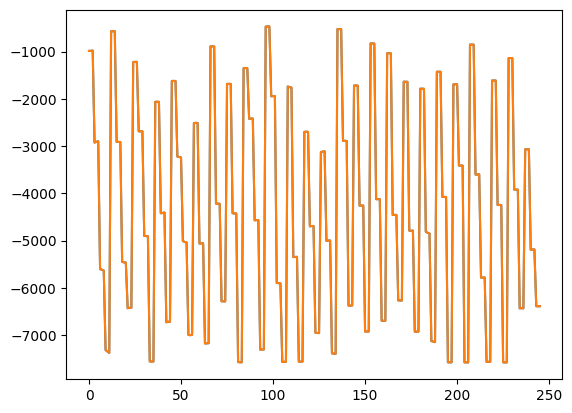

In [24]:
plt.plot(data['labfit'])
plt.plot(data['labfit0'])